# Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms. In this exercise, we will develop the intuition behind support vector machines and their use in classification problems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To begin with, let us generate the data for a linear classification problem. In order to do so use the `make_blobs` function from `sklearn`. We want to generate 50 samples, set the `random_state=0` and `cluster_std=0.6`. Finally plot the points with `plt.scatter`

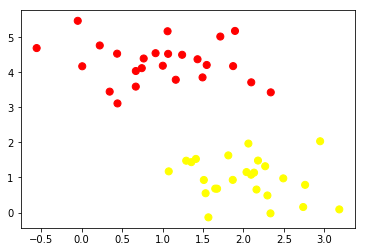

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. Think about a line that separates the two classes, how many are there? Which do you think would be the more appropiate given the data points? Draw some lines over this plot with slopes [1, 0.5, -0.2] and biases [0.65, 1.6, 2.9]. Use the `np.linespace` function to generate the x and the line equation 

$$y = mx + b$$

for the y. Finally plot a "new point" in the coordinates (0.6, 2.1) with a red X.

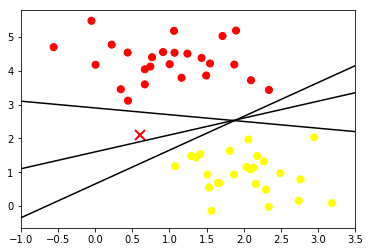

In [3]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

## SVM margins and support vectors
These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!.

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a line between the classes, we can draw around each line a margin of some width, up to the nearest point (no matter the class). To visualize this, let us repeat the same plot but adding some code to fill the margins. Use the method `plt.fill_between` with `color='#AAAAAA'`. The margins for each of the lines above are [0.33, 0.55, 0.2].

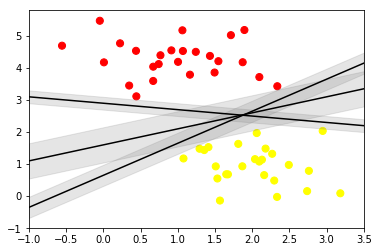

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='gray', alpha=0.2)

plt.xlim(-1, 3.5)
plt.show()

Now fit an SVM to this data. Use Scikit-Learn's support vector classifier to train an SVM model. For the time being, we will use a linear kernel and set the C parameter to a very large number like 1E10. 



In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now retrieve the support vectors from the learned model. Would you be able to identify them on the plot? Why are these the support vectors? Why are they important?

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

This function will plot the decision boundaries of a model and the support vectors. 

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',
                   edgecolors='blue')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Generate a scatter plot of the data set and use the previous function to draw the support vectors and the decision boundaries 

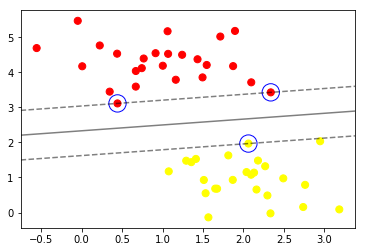

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

In order to see an example of this, simulate the points with the same random seed, but now simulate 120. Then train again the SVM and plot the decision boundaries. Which are the support vectors this time? Is this an expected result? Why?

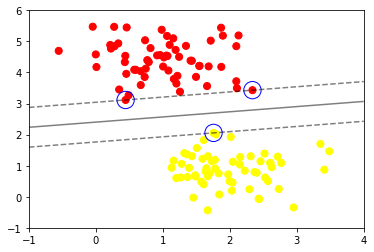

In [9]:
X, y = make_blobs(n_samples=120, centers=2,
                  random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

## SVM softening the margins
Now add a new point which is inside the decision boundary, say (-0.5, 2) to class 0, what do you expect will happen?

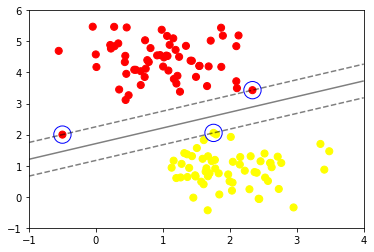

In [10]:
X = np.vstack((X, np.array([-0.5, 2])))
y = np.append(y, 0)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

How about adding an even more outlier, like (0, 0) to class 0.

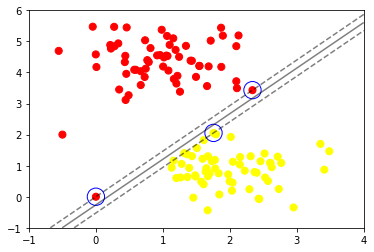

In [11]:
X = np.vstack((X, np.array([0, 0])))
y = np.append(y, 0)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

What happened to the margin? Could we use this model if we had a red point further right? Why?

Now, is there a way that we could try to make the SVM more robust to these possible outliers? Which one? Try to implement an SVM model with the same data modifying the C parameter. What do you observe?

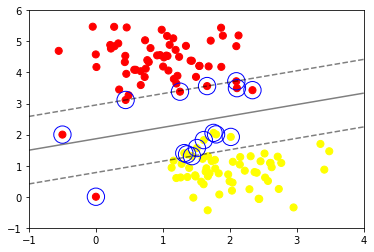

In [12]:
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

## SVM Kernels
Now we have seen that SVM are very useful to find the optimal separating hyper-plane when your data is linearly separable. Even when you have some noise in the data set, you can tune the C-value to be able to adjust this. But what happens if your classes are not linearly separable? Is there a way we could overcome this draw-back? Let us generate a dataset that is not linearly separable. Use the `make_circles` method from `samples_generator` in sklearn. Generate 100 examples with `factor=.1, noise=.1, random_state=0`. Then generate a scatter plot to visualize the samples, use a different color for each class.

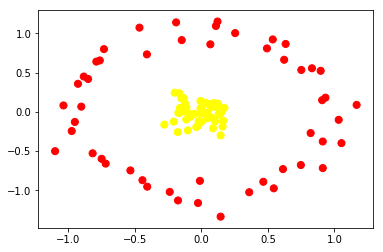

In [13]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Now try to classify this data with a linear SVM, what do you expect will happen? Does this model capture the pattern of the classes? Plot the classification results with the `plot_svc_decision_function`

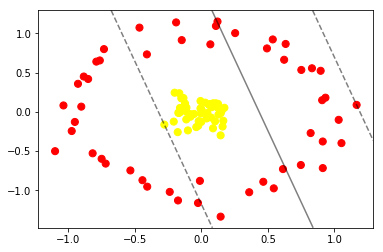

In [14]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

What could we do in order to make this dataset linearly separable? We can project it into a higher dimensional space. Note the similarity between this, and the polynomial regression. In order to have a better understanding of how kernels work, first implement a third axis with python with the following expression:

$$x_3 = e^{-(x_1^2 + x_2^2)}$$

Actually this is somewhat equivalent to the rbf kernel. You should name the new axis `x_3`

In [15]:
x_3 = np.exp(-(X ** 2).sum(1))

Once you have implemented this 3rd axis, you may 

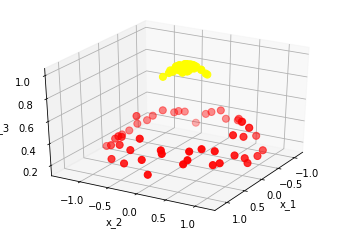

In [16]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], x_3, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('x_3')
    
interact(plot_3D, elev=[30, 0, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

Now use the SVM classifier but set the `kernel='rbf'` with high value for C and plot the results

In [28]:
clf.get_params()

{'C': 100.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

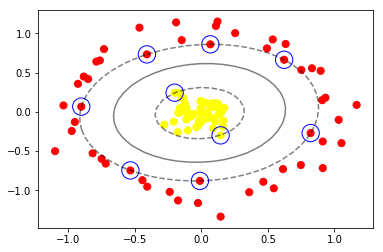

In [17]:
clf = SVC(kernel='rbf', C=1E2, gamma='auto')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Evaluating the classification results
In order to assess the goodness of our model we need to compute some quantitative scores, we will review some of the most relevant. First, use the function `make_blobs` to generate a multilabel dataset. Generate 200 samples with 4 different classes set `random_state=0` and `cluster_std=0.6` 

In [18]:
X, y = make_blobs(n_samples=1000, centers=4,
                  random_state=0, cluster_std=0.6)

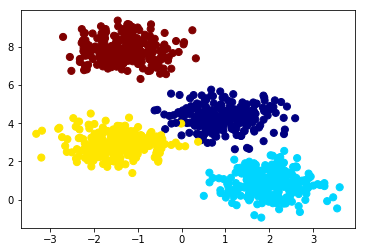

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
plt.show()

Split the data set in training and test and apply the SVC with `C=1, kernel='rbf', gamma='auto', class_weight='balanced', decision_function_shape='ovr'` 

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

svc = SVC(C=1, kernel='linear', gamma='auto',
          class_weight='balanced', 
          decision_function_shape='ovr')

svc.fit(Xtrain, ytrain)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Predict on the test set and plot the confusion matrix, use the `confusion_matrix` function from sklearn and `heatmap` from seaborn. What would be the confusion matrix result of a perfect classification? What information can we extract from it?

In [21]:
y_pred = svc.predict(Xtest)

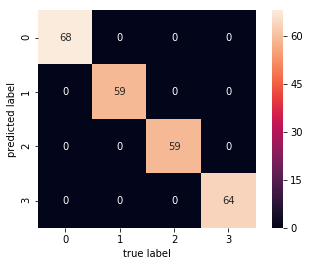

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

Finally compute the accuracy score, what does this value mean?

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest, y_pred))

1.0


You can use the follwing code to visualize the decision function computed by the model. 

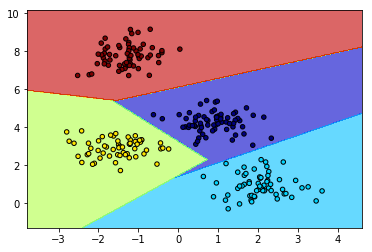

In [24]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

X0, X1 = Xtest[:, 0], Xtest[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(svc, xx, yy,
               cmap='jet', alpha=0.6)

plt.scatter(X0, X1, c=ytest, cmap='jet', s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Now repeat the computations with a linear kernel, what changes do you observe? Now change the `cluster_std` when you generate the data, what would you expecte when you increase it? and when you decrease it? 